## Exercise 5: Communities

In this exercise, we are mainly analyzing the community structure of Zachary's karate club graph with some of the algorithms presented in lecture.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

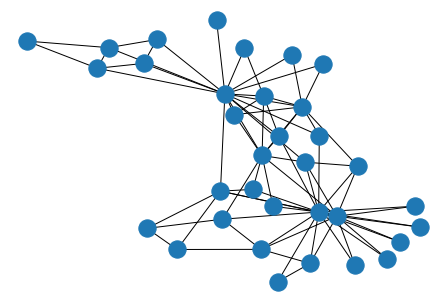

In [2]:
# load the karate club graph
G=nx.karate_club_graph()
nx.draw(G)

### Task 1: The Girvan-Newman Algorithm

__a)__ Implement the Girvan-Newman community detection algorithm, using the signature in the cell below. Don't use the corresponding function in NetworkX, but you may use other networkX functions. Recall the following outline of the algorithm:

0. Create an empty list to hold the communities at different levels.
1. The betweenness of all existing edges in the network is calculated first.
2. The edge with the highest betweenness is removed.
3. The betweenness of all edges affected by the removal is recalculated.
4. Find the connected components of the graph - if there is a change in the number of components, update the list.
5. Steps 2, 3, and 4 are repeated until no edges remain.


In [3]:
def girvan_newman(G):
    """
    :param G: networkx graph
    :
    :return: a list of lists, which defines a hierarchy of communities
    :        -> each list corresponds to a new partition of the network that appears when a new component becomes disconnected
    """
    G2 = G.copy() #make a copy of the graph - as we are cutting edges we lose the original graph!
    partition_hierarchy = [] #initialize a list for the partitions at different levels
    components = list(nx.connected_components(G2)) #list the connected components
    while len(G2.edges) > 0: #loop: while we still have edges to cut, keep going
        edge_centrality = nx.edge_betweenness_centrality(G2) #calculate edge betweenness centrality
        central_edge = max(edge_centrality, key=edge_centrality.get) #get the most central edge
        G2.remove_edge(*central_edge) #remove this edge
        new_components = list(nx.connected_components(G2)) #get the connected components
        if len(new_components)>len(components): #check: are there more components than there were before?
            partition_hierarchy.append(list(nx.connected_components(G2))) #if yes- we have a new partition!
            components = new_components #update the list of components
    return partition_hierarchy #return the list of communities

__b)__ Apply your implementation to the karate club network. Extract the partition which results in two communities and plot the network with the nodes colored by community membership!

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


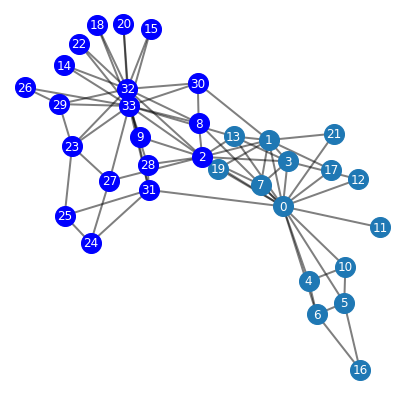

In [4]:
partition = girvan_newman(G)
two_components = [p for p in partition if len(p)==2][0]
print(two_components)

plt.figure(figsize=(7,7))
pos=nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=two_components[0])
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=two_components[1], node_color='b')
nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G,pos,font_size=12, font_color="w")
plt.axis('off')
plt.show()

### Task 2: Evaluation Partitions with Modularity

Apply the networkX function to calculate the modularity of the partitions from task 1, using the partitions in $k\in\{2,3,4,5,6,7,8,9,10\}$ components. Plot the modularity as a function of your the number of communities!
Afterwards, plot the network with the partition that yielded the best modularity score!

In [5]:
girvan_newman_mod = community.modularity(G,two_components)
community.modularity(G,two_components)

0.359960552268243

Text(0, 0.5, 'modularity')

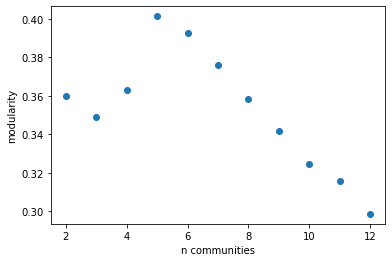

In [6]:
modularities = []
for i in range(11):
    modularities.append(community.modularity(G,partition[i]))
    
plt.scatter(x=range(2,13),y=modularities)
plt.xlabel('n communities')
plt.ylabel('modularity')

In [7]:
partition[3]

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9}]

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]


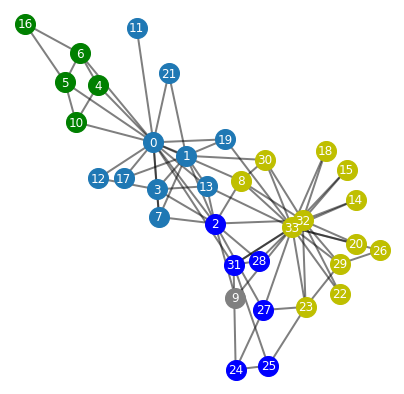

In [8]:
partition = girvan_newman(G)
five_components = [p for p in partition if len(p)==5][0]
print(five_components)

plt.figure(figsize=(7,7))
pos=nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[0])
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[1], node_color='b')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[2], node_color='g')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[3], node_color='y')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[4], node_color='grey')

nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G,pos,font_size=12, font_color="w")
plt.axis('off')
plt.show()

### Task 3: A Different Edge Importance Measure for Girvan-Newman

__a)__ Adapt your implementation of the Girvan-Newman algorithm from task 1) such that it ranks edges in increasing order by the number of shared neighbors they have. Use the signature in the cell below!

For example, if two nodes connected by an edge have 5 friends in common, and another two nodes connected by an edge have 0 friends in common, the latter edge should be ranked highest. You may break ties arbitrarily!

In [9]:
def girvan_newman_alt(G):
    """
    :param G: networkx graph
    :
    :return: a list of lists, which defines a hierarchy of communities
    :        -> each list corresponds to a new partition of the network that appears when a new component becomes disconnected
    """
    G2 = G.copy()
    partition_hierarchy = []
    components = list(nx.connected_components(G2))
    while len(G2.edges) > 0:
        edge_overlap_centrality = {}
        for edge in G2.edges():
            edge_overlap_centrality[edge]=len(list(nx.common_neighbors(G2,edge[0],edge[1])))
        central_edge = min(edge_overlap_centrality, key=edge_overlap_centrality.get)
        G2.remove_edge(*central_edge)
        new_components = list(nx.connected_components(G2))
        if len(new_components)>len(components):
            partition_hierarchy.append(list(nx.connected_components(G2)))
            components = new_components
    return partition_hierarchy

__b)__ Redo the modularity analysis and the plots from task 2, using the adpated version of Girvan-Newman from a)!

Text(0, 0.5, 'modularity')

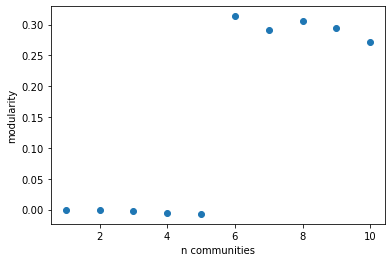

In [11]:
modularities = []
for i in range(1,11):
    modularities.append(community.modularity(G,alt_partition[i]))
    
plt.scatter(x=range(1,11),y=modularities)
plt.xlabel('n communities')
plt.ylabel('modularity')

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {9}, {11}, {12}, {17}, {19}]


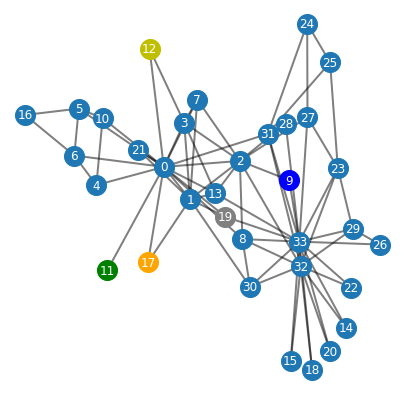

In [10]:
alt_partition = girvan_newman_alt(G)
six_components = [p for p in alt_partition if len(p)==6][0]
print(six_components)

plt.figure(figsize=(7,7))
pos=nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[0])
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[1], node_color='b')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[2], node_color='g')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[3], node_color='y')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[4], node_color='orange')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[5], node_color='grey')

nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G,pos,font_size=12, font_color="w")
plt.axis('off')
plt.show()